### Setup

In [1]:
import torch
from torch import nn
import torchvision
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
rng_seed = 1144

# Download MNIST
torchvision.datasets.MNIST('.', download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 162326495.15it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 44551560.80it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45460404.89it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7517967.15it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train

## Plot Loss and Gradient (20%)
In this part, you will write code to plot the output and gradient for a single neuron with
Sigmoid activation and two different loss functions. As shown in Figure 1, You should
implement a single neuron with input 1, and calculate different losses and corresponding
error.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig1.png" width=1200/></div>

<center>Figure 1: Network diagram for part 1.</center>

All the figures plotted in this part should have the same range of x-axis and y-axis. The
range should be centered at 0 but the extend should be picked so as to see the difference
clearly.

A set of example plots are provided in Figure 2. Here we use ReLU (instead of Sigmoid)
activation and L2 loss as an example.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig2.png" width=800/></div>

<center>Figure 2: Example plots with ReLU activation and L2 loss. Left: Output of ReLU function.
Middle: Loss plot with L2 loss. Right: Gradient plot.</center>

Plot a 3D figure showing the relations of output of Sigmoid function and weight/bias. To be specific, x-axis is weight, y-axis is bias, and z-axis is the out-put.

In [2]:
def sigmoid(w, b, x = 1):
  """
  Calculates a sigmoid function for x tensor always 1.
    Parameter:
        w : weight
        b : bias
    Returns:
        sigmoid_val (float): 1 / (1 + e^-(wx+b))
        exponent = torch.exp(-(w*x + b)) # calculate e^-(wx+b)
        return 1 / (1 + exponent)
  """
  exponent = torch.exp(-(w*x + b)) # calculate e^-(wx+b)
  return 1 / (1 + exponent)

In [3]:
weight = torch.linspace(-7, 7, 100)
bias = torch.linspace(-7, 7, 100)

In [4]:
weight, bias

(tensor([-7.0000, -6.8586, -6.7172, -6.5758, -6.4343, -6.2929, -6.1515, -6.0101,
         -5.8687, -5.7273, -5.5859, -5.4444, -5.3030, -5.1616, -5.0202, -4.8788,
         -4.7374, -4.5960, -4.4545, -4.3131, -4.1717, -4.0303, -3.8889, -3.7475,
         -3.6061, -3.4646, -3.3232, -3.1818, -3.0404, -2.8990, -2.7576, -2.6162,
         -2.4747, -2.3333, -2.1919, -2.0505, -1.9091, -1.7677, -1.6263, -1.4848,
         -1.3434, -1.2020, -1.0606, -0.9192, -0.7778, -0.6364, -0.4949, -0.3535,
         -0.2121, -0.0707,  0.0707,  0.2121,  0.3535,  0.4949,  0.6364,  0.7778,
          0.9192,  1.0606,  1.2020,  1.3434,  1.4848,  1.6263,  1.7677,  1.9091,
          2.0505,  2.1919,  2.3333,  2.4747,  2.6162,  2.7576,  2.8990,  3.0404,
          3.1818,  3.3232,  3.4646,  3.6061,  3.7475,  3.8889,  4.0303,  4.1717,
          4.3131,  4.4545,  4.5960,  4.7374,  4.8788,  5.0202,  5.1616,  5.3030,
          5.4444,  5.5859,  5.7273,  5.8687,  6.0101,  6.1515,  6.2929,  6.4343,
          6.5758,  6.7172,  

In [5]:
# Create a meshgrid for a 3-d plot
# Reference: https://pytorch.org/docs/stable/generated/torch.meshgrid.html

weight, bias = torch.meshgrid(weight, bias)
weight = torch.tensor(weight, requires_grad=True)
bias = torch.tensor(bias, requires_grad=True)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
<ipython-input-5-1f0680d2f699>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weight = torch.tensor(weight, requires_grad=True)
<ipython-input-5-1f0680d2f699>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bias = torch.tensor(bias, requires_grad=True)


In [6]:
output = sigmoid(weight, bias)

In [7]:
weight, bias, output

(tensor([[-7.0000, -7.0000, -7.0000,  ..., -7.0000, -7.0000, -7.0000],
         [-6.8586, -6.8586, -6.8586,  ..., -6.8586, -6.8586, -6.8586],
         [-6.7172, -6.7172, -6.7172,  ..., -6.7172, -6.7172, -6.7172],
         ...,
         [ 6.7172,  6.7172,  6.7172,  ...,  6.7172,  6.7172,  6.7172],
         [ 6.8586,  6.8586,  6.8586,  ...,  6.8586,  6.8586,  6.8586],
         [ 7.0000,  7.0000,  7.0000,  ...,  7.0000,  7.0000,  7.0000]],
        requires_grad=True),
 tensor([[-7.0000, -6.8586, -6.7172,  ...,  6.7172,  6.8586,  7.0000],
         [-7.0000, -6.8586, -6.7172,  ...,  6.7172,  6.8586,  7.0000],
         [-7.0000, -6.8586, -6.7172,  ...,  6.7172,  6.8586,  7.0000],
         ...,
         [-7.0000, -6.8586, -6.7172,  ...,  6.7172,  6.8586,  7.0000],
         [-7.0000, -6.8586, -6.7172,  ...,  6.7172,  6.8586,  7.0000],
         [-7.0000, -6.8586, -6.7172,  ...,  6.7172,  6.8586,  7.0000]],
        requires_grad=True),
 tensor([[8.3153e-07, 9.5784e-07, 1.1033e-06,  ..., 4.2976e-

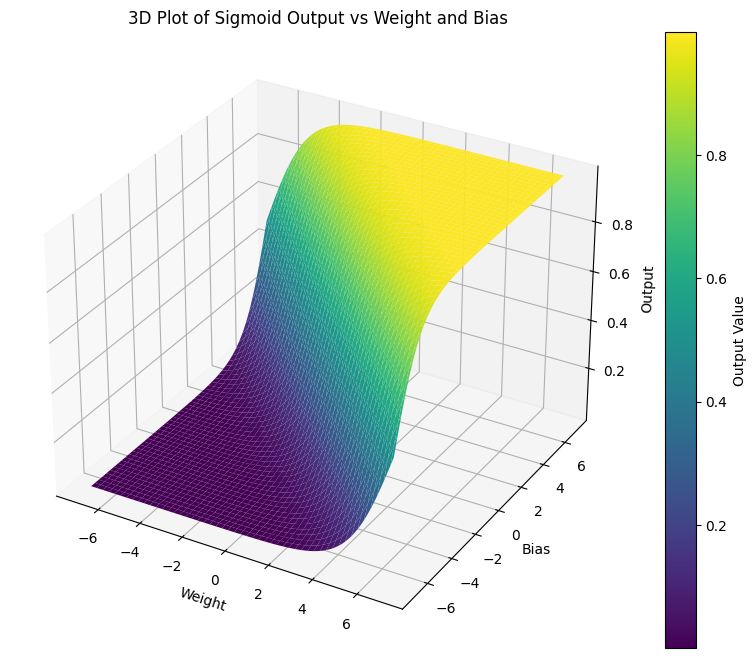

In [8]:
# 3d plot
# Reference: https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10, 8))

# Convert Weight, Bias, and output to NumPy arrays for plotting
Weight_np = weight.detach().numpy()
Bias_np = bias.detach().numpy()
output_np = output.detach().numpy()

# Create the surface plot
surface = ax.plot_surface(Weight_np, Bias_np, output_np, cmap='viridis')

# Add labels and a colorbar
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Output')
ax.set_title('3D Plot of Sigmoid Output vs Weight and Bias')
fig.colorbar(surface, label='Output Value')

plt.show()

Experiment with L2 loss. The L2 loss is defined as $\mathcal{L}_{L2} = (\hat{y} - y)^2$, where $y$ is
the ground truth and $\hat{y}$ is the prediction. Let $y = 0.5$ and plot a 3D figure showing
2 the relations of L2 loss and weight/bias. To be specific, the x-axis is weight, y-axis is
bias, and z-axis is the L2 loss.

In [9]:
def l2_loss(w, b):
    y_hat = sigmoid(w,b)
    y = 0.5 * torch.ones_like(y_hat)
    return torch.pow(y_hat - y, 2)

In [10]:
l2_loss_value = l2_loss(weight, bias)

In [11]:
l2_loss_value

tensor([[0.2500, 0.2500, 0.2500,  ..., 0.0049, 0.0012, 0.0000],
        [0.2500, 0.2500, 0.2500,  ..., 0.0012, 0.0000, 0.0012],
        [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0012, 0.0049],
        ...,
        [0.0049, 0.0012, 0.0000,  ..., 0.2500, 0.2500, 0.2500],
        [0.0012, 0.0000, 0.0012,  ..., 0.2500, 0.2500, 0.2500],
        [0.0000, 0.0012, 0.0049,  ..., 0.2500, 0.2500, 0.2500]],
       grad_fn=<PowBackward0>)

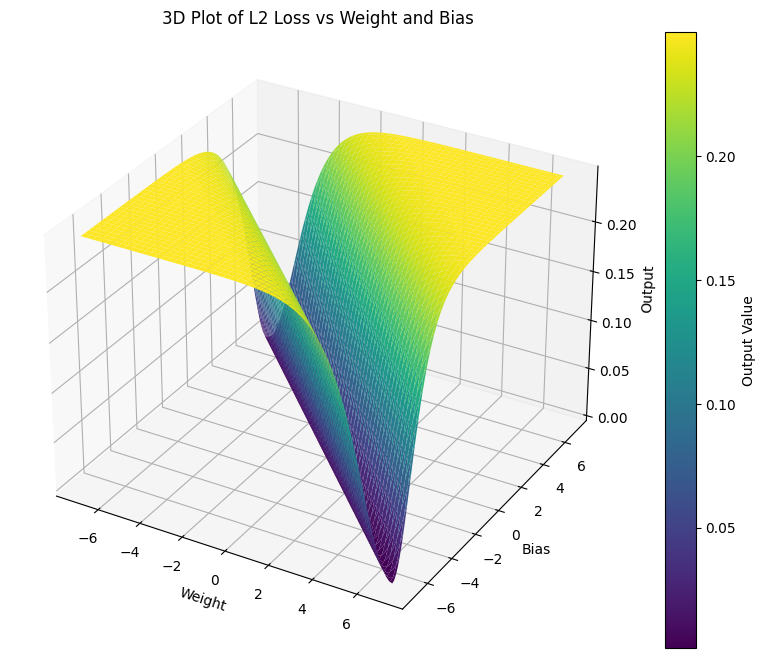

In [12]:
# 3d plot

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10, 8))

# Convert Weight, Bias, and output to NumPy arrays for plotting
l2_loss_value_np = l2_loss_value.detach().numpy()

# Create the surface plot
surface = ax.plot_surface(Weight_np, Bias_np, l2_loss_value_np, cmap='viridis')

# Add labels and a colorbar
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Output')
ax.set_title('3D Plot of L2 Loss vs Weight and Bias')
fig.colorbar(surface, label='Output Value')

plt.show()

Experiment with back-propagation with L2 loss. Compute $\frac{\partial \mathcal{L}_{L2}}{\partial \text{weight}}$ and plot a 3D figure showing the relations of gradient and weight/bias. To be specific, the x-axis is weight, y-axis is bias, and z-axis is the gradient w.r.t. weight.

Derivation of ∂L2/∂weight:

L2 loss = (𝑦̂ - 𝑦)^2

To calculate ∂L2/∂weight, we use the chain rule:

1. Compute ∂L2/∂𝑦̂ as 2(𝑦̂ - 𝑦).

2. Calculate ∂𝑦̂/∂𝑥 using the derivative of the sigmoid function: 𝑦̂ * (1 - 𝑦̂).

3. Determine ∂𝑥/∂weight, which is the input value (assumed to be 1).

Now, we can compute ∂L2/∂weight as the product of these derivatives:

∂L2/∂weight = 2(𝑦̂ - 𝑦) * 𝑦̂ * (1 - 𝑦̂) * 1

So, the gradient of L2 with respect to weight when 𝑦̂ is the output of a sigmoid function is:

∂L2/∂weight = 2(𝑦̂ - 𝑦) * 𝑦̂ * (1 - 𝑦̂)

In [13]:
weight

tensor([[-7.0000, -7.0000, -7.0000,  ..., -7.0000, -7.0000, -7.0000],
        [-6.8586, -6.8586, -6.8586,  ..., -6.8586, -6.8586, -6.8586],
        [-6.7172, -6.7172, -6.7172,  ..., -6.7172, -6.7172, -6.7172],
        ...,
        [ 6.7172,  6.7172,  6.7172,  ...,  6.7172,  6.7172,  6.7172],
        [ 6.8586,  6.8586,  6.8586,  ...,  6.8586,  6.8586,  6.8586],
        [ 7.0000,  7.0000,  7.0000,  ...,  7.0000,  7.0000,  7.0000]],
       requires_grad=True)

In [14]:
# Calculate the gradient with respect to weight for each combination of weight and bias

# Equivalent: gradient_weight = 2 * (sigmoid(weight, bias) - 0.5) * sigmoid(weight, bias) * (1 - sigmoid(weight, bias))
gradient_weight = torch.autograd.grad(l2_loss_value.sum(), weight, retain_graph=True)[0]

<Figure size 640x480 with 0 Axes>

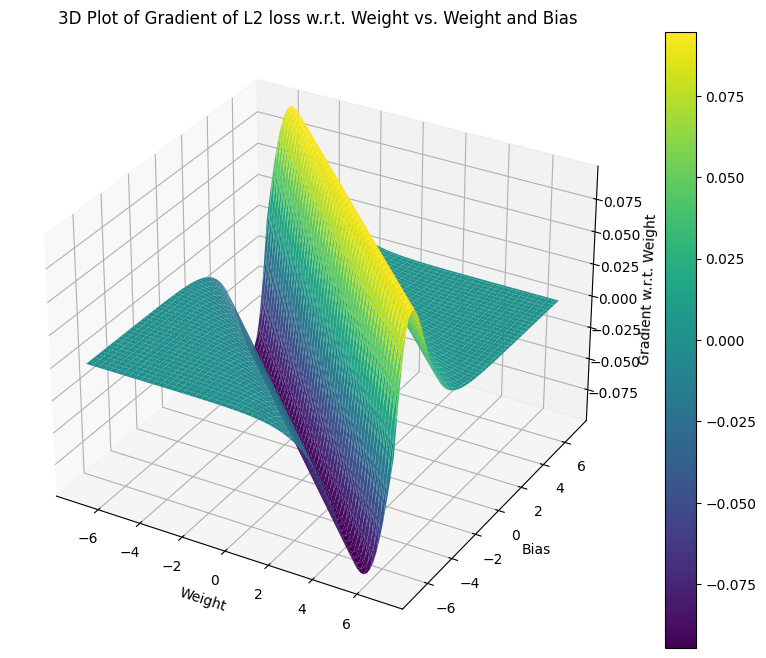

In [15]:
# Create a 3D plot
fig = plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10, 8))

# Plot the surface
surface = ax.plot_surface(Weight_np, Bias_np, gradient_weight.detach().numpy(), cmap='viridis')

# Add labels and title
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Gradient w.r.t. Weight')
ax.set_title('3D Plot of Gradient of L2 loss w.r.t. Weight vs. Weight and Bias')

# Add a color bar
fig.colorbar(surface)

# Show the plot
plt.show()

Experiment with cross-entropy loss. The cross-entropy loss is defined as $\mathcal{L}_{CE} = -(y \log{\hat{y}} + (1 - y)\log{(1 - \hat{y})})$, where $y$ is the ground truth probability and $\hat{y}$ is the
predicted probability. Let $y = 0.5$ and plot a 3D figure showing the relations of
cross-entropy loss and weight/bias. To be specific, the x-axis is weight, y-axis is bias,
and z-axis is the cross-entropy loss.

In [16]:
def ce_loss(w, b):
    y_hat = sigmoid(w, b)
    y = 0.5 * torch.ones_like(y_hat)
    return -(y*torch.log(y_hat) + (1 - y)*torch.log(1 - y_hat))

In [17]:
ce_loss_value = ce_loss(weight, bias)

In [18]:
ce_loss_value

tensor([[7.0000, 6.9293, 6.8586,  ..., 0.7031, 0.6956, 0.6931],
        [6.9293, 6.8586, 6.7879,  ..., 0.6956, 0.6931, 0.6956],
        [6.8586, 6.7879, 6.7172,  ..., 0.6931, 0.6956, 0.7031],
        ...,
        [0.7031, 0.6956, 0.6931,  ..., 6.7287, 6.7722, 6.8726],
        [0.6956, 0.6931, 0.6956,  ..., 6.7722, 6.8726, 6.9315],
        [0.6931, 0.6956, 0.7031,  ..., 6.8726, 6.9315, 6.9982]],
       grad_fn=<NegBackward0>)

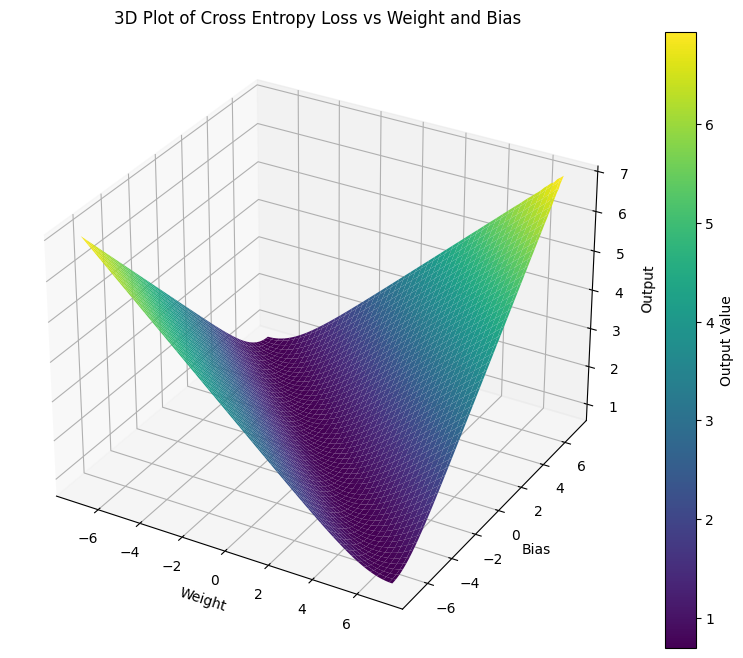

In [19]:
# 3d plot
# Reference: https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10, 8))

# Convert Weight, Bias, and output to NumPy arrays for plotting
ce_loss_value_np = ce_loss_value.detach().numpy()

# Create the surface plot
surface = ax.plot_surface(Weight_np, Bias_np, ce_loss_value_np, cmap='viridis')

# Add labels and a colorbar
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Output')
ax.set_title('3D Plot of Cross Entropy Loss vs Weight and Bias')
fig.colorbar(surface, label='Output Value')

plt.show()

Experiment with back-propagation with cross-entropy loss. Compute $\frac{\partial \mathcal{L}_{CE}}{\partial \text{weight}}$ and plot a 3D figure showing the relations of gradient and weight/bias. To be specific, the x-axis is weight, y-axis is bias, and z-axis is the gradient w.r.t. weight.

CE Loss (CE) = -[y * log(ŷ) + (1 - y) * log(1 - ŷ)]

1. Compute ∂CE/∂ŷ:
   ∂CE/∂ŷ = (ŷ - y) / (ŷ * (1 - ŷ))

2. Calculate ∂ŷ/∂x, where x is the weighted sum:
   ∂ŷ/∂x = ŷ * (1 - ŷ)

3. Determine ∂x/∂weight, which is the input value:
   ∂x/∂weight = input

Combine these derivatives using the chain rule to get ∂CE/∂weight:
∂CE/∂weight = (ŷ - y) * input

Here, input = 1.

In [20]:
# Calculate the gradient with respect to weight for each combination of weight and bias
# y = 0.5 * torch.ones_like(sigmoid(weight, bias)) # assume
# Equivalent: gradient_weight = sigmoid(weight, bias) - y
gradient_weight = torch.autograd.grad(ce_loss_value.sum(), weight)[0]

<Figure size 640x480 with 0 Axes>

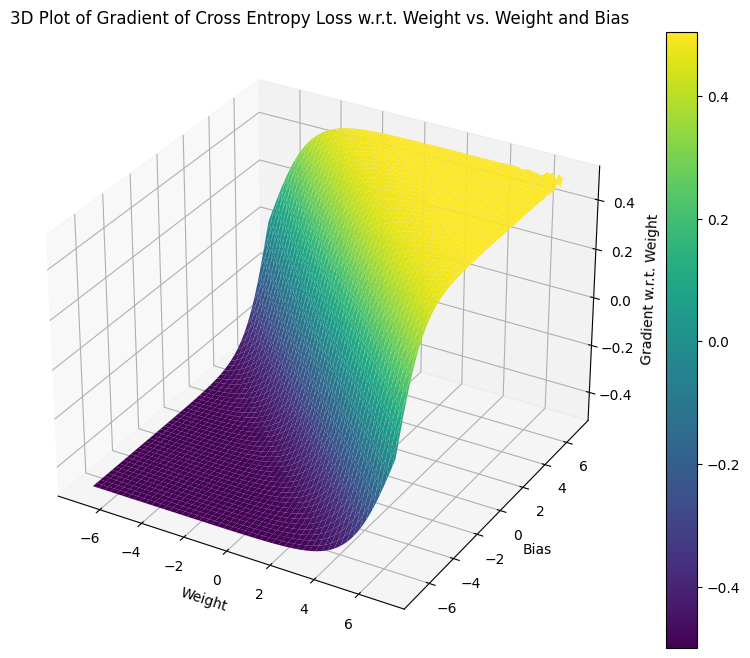

In [21]:
# Create a 3D plot
fig = plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10, 8))

# Plot the surface
surface = ax.plot_surface(Weight_np, Bias_np, gradient_weight.detach().numpy(), cmap='viridis')

# Add labels and title
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Gradient w.r.t. Weight')
ax.set_title('3D Plot of Gradient of Cross Entropy Loss w.r.t. Weight vs. Weight and Bias')

# Add a color bar
fig.colorbar(surface)

# Show the plot
plt.show()

6. (3%) Explain what you observed from the above 5 plots. The explanation should include:
 1. What's the difference between cross-entropy loss and L2 loss?
 2. What's the difference between the gradients from cross-entropy loss and L2 loss?
 3. Predict how these differences will influence the efficiency of learning.

* Cross Entropy loss exhibits significantly higher magnitudes compared to L2 loss, which is an anticipated outcome since CE loss imposes substantial penalties for incorrect predictions, thereby emphasizing the treatment of outliers.

* The gradient of the cross entropy loss surpasses that of the L2 loss in terms of magnitude. On top of this, gradient of L2 loss goes to zero earlier as compared to the cross entropy loss. The gradient of cross entropy loss is smoother than that of the L2 loss.

* L2 loss is used for regression tasks, while Cross-Entropy loss is used for classification tasks. The effectiveness of the learning process and its efficiency hinges on various factors, including the choice of the loss function. This is due to the fact that different loss functions penalizes outliers to varying degrees, consequently influencing overall accuracy. Cross entropy loss, for instance, excels when dealing with classification problems.

## Solving XOR with a 2-layer Perceptron
Build and visualize a 2-layer perceptron that computes
the XOR function. The network architecture is shown in Figure 3. The MLP has 1 hidden
layer with 2 neurons. The activation function used for the hidden layer is the hyperbolic
tangent function. Since we aim to model a boolean function the output of the last layer is
passed through a sigmoid activation function to constrain it between 0 and 1.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig3.png" width=800/></div>

<center>Figure 3: Graphical representation of the 2-layer Perceptron</center>

1. (5%) Formulate the XOR approximation as an optimization problem using the cross
entropy loss. _Hint: Your dataset consists of just 4 points, $x_1 = (0,0)$, $x_2 = (0,1)$,
$x_3 = (1,0)$ and $x_4 = (1,1)$ with ground truth labels 0, 1, 1 and 0 respectively._

1. Model
Hidden Layer Output: <br>
Neuron 1 Output: h1(x) = tanh(w11 * x1 + w12 * x2 + b1) <br>
Neuron 2 Output: h2(x) = tanh(w21 * x1 + w22 * x2 + b2) <br>
Final Output (After Sigmoid Activation): $\hat{y}$ = sigmoid(w31 * h1(x) + w32 * h2(x) + b3) <br><br>

2. Loss Function
Cross-Entropy Loss for a Single Example:<br>
$L_{\text{CE}}(y, \hat{y}) = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]$

3. Optimization Problem
Total Loss over the Dataset: <br>
$L_{min}$ = $-\frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]$<br><br>

4. Compute the Predictions<br>
Predicted Output for Each Data Point:<br>
$\hat{y}$ = sigmoid(w31 * h1(xi) + w32 * h2(xi) + b3)<br><br>

5. Optimization<br>
Use an optimization algorithm like gradient descent to minimize J(θ) by adjusting the parameters (w11, w12, w21, w22, w31, w32, b1, b2, b3) of your neural network.

Use gradient descent to learn the network weights that optimize the loss. Intuitively, the 2 layer perceptron first performs a nonlinear mapping from $(x_1,x_2) \rightarrow (h_1,h_2)$ and then learns a linear classifier in the $(h_1,h_2)$ plane.

 For different steps during training visualize the image of each input point $x_i$ in the $(h_1,h_2)$ plane as well as the decision boundary (separating line) of the classifier.

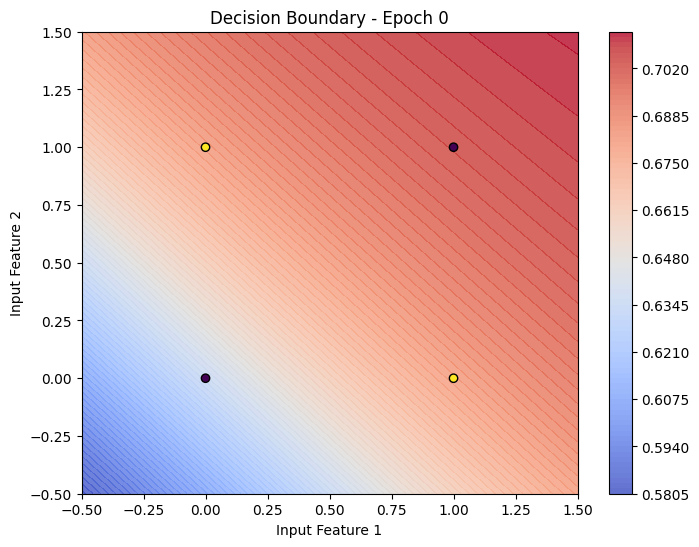

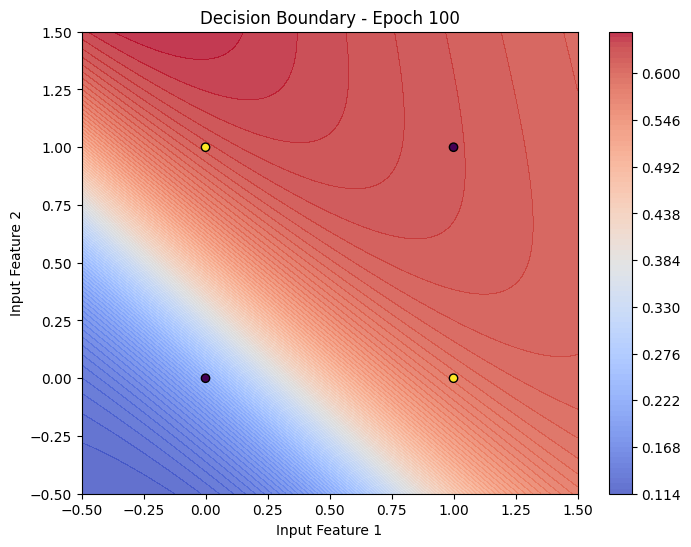

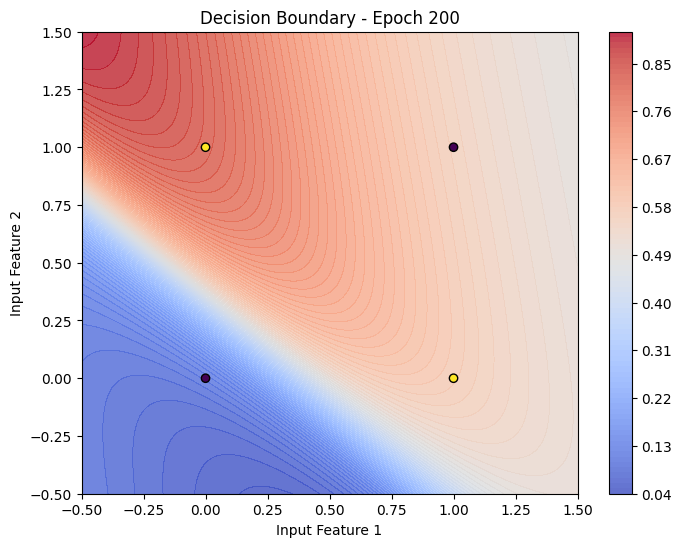

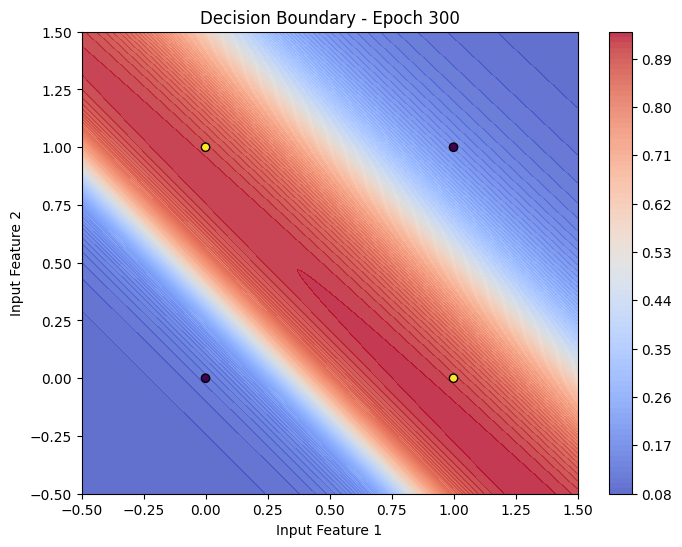

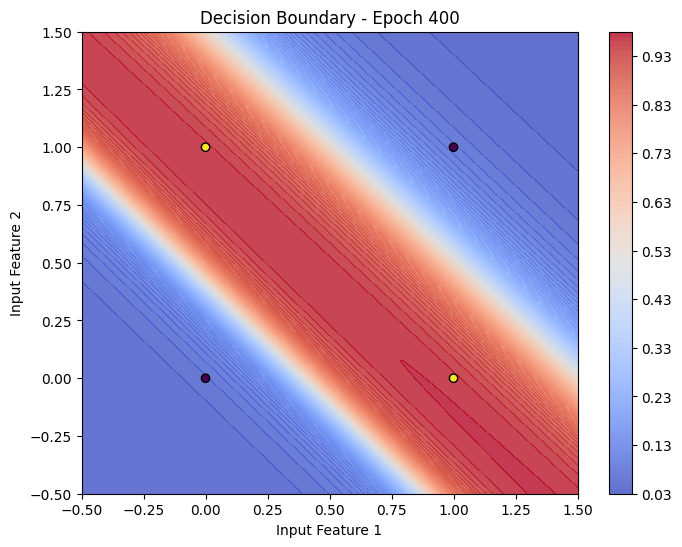

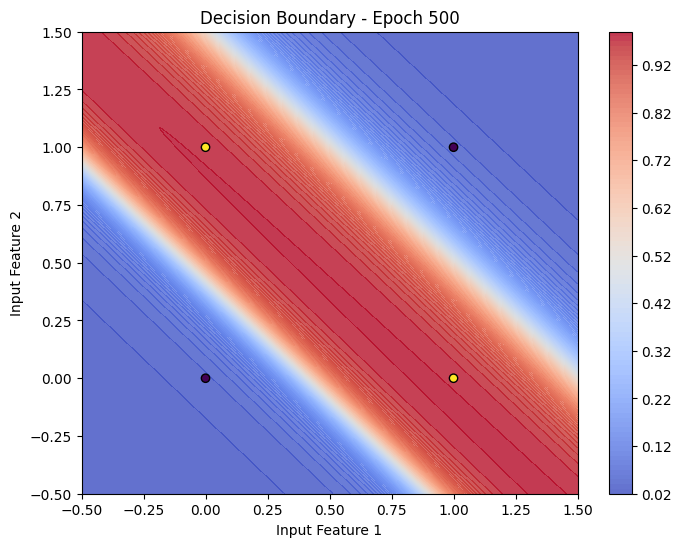

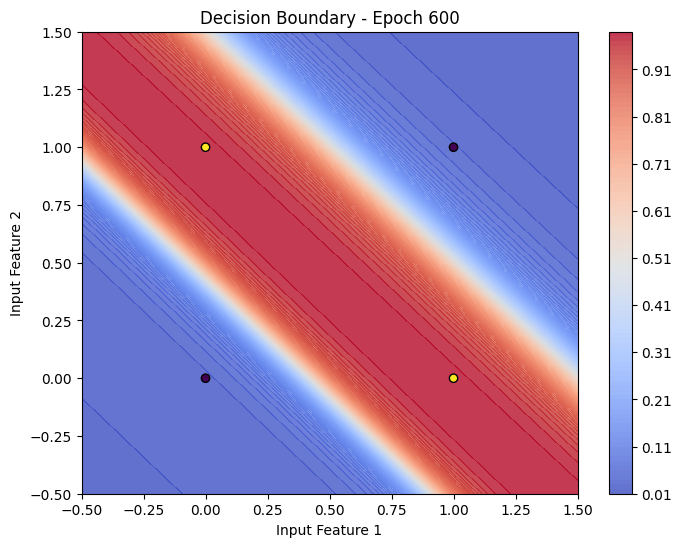

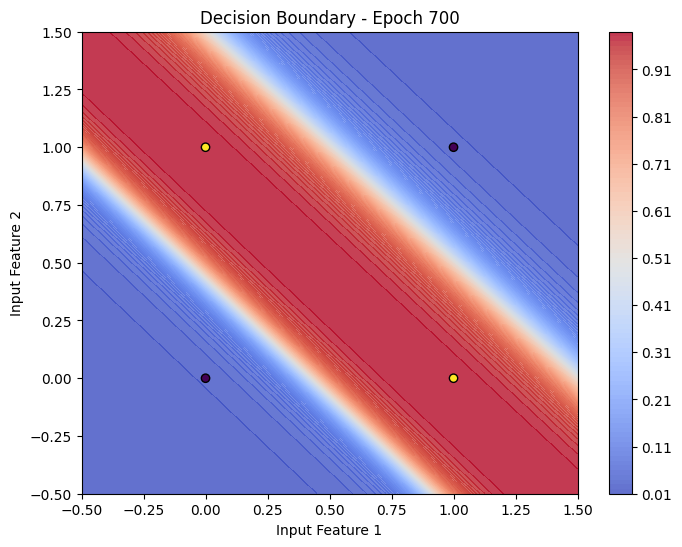

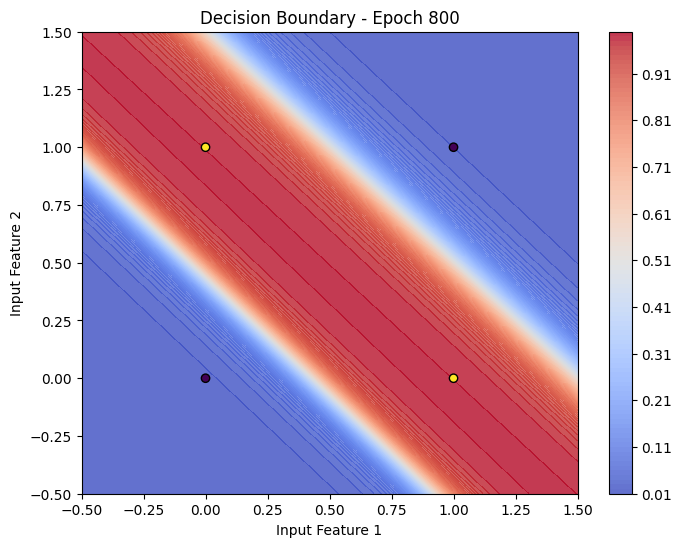

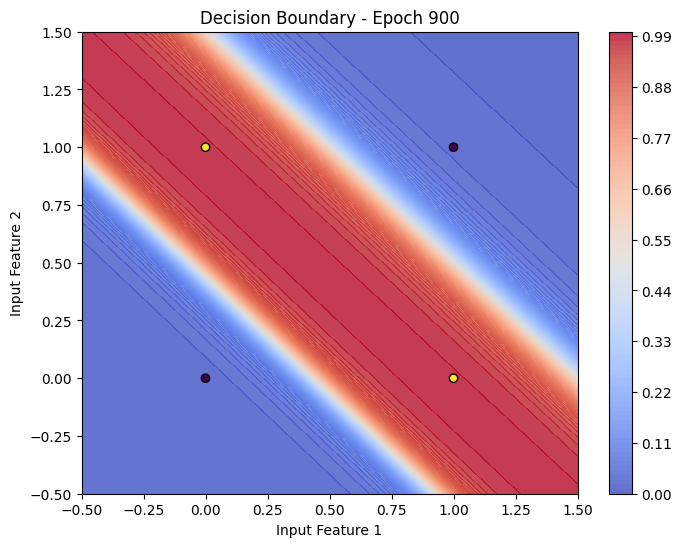

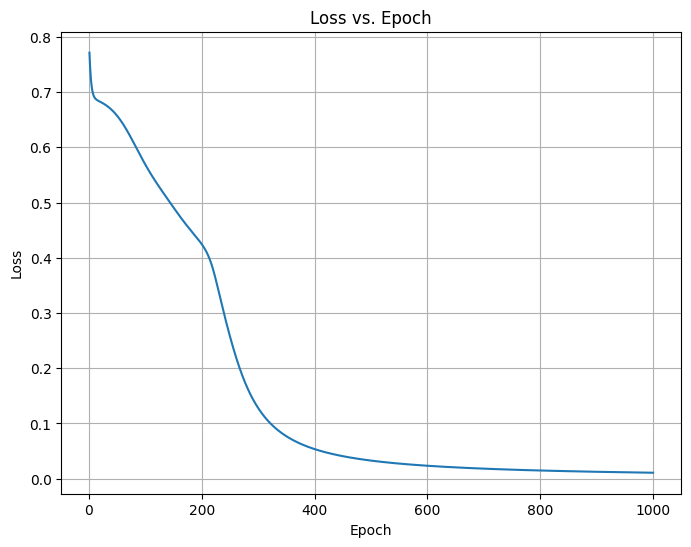

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Make your dataset here
data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
labels = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

# Make your network here
network = nn.Sequential(
    nn.Linear(2, 2),  # 2 input features, 2 hidden neurons
    nn.Tanh(),
    nn.Linear(2, 1),  # 2 hidden neurons, 1 output
    nn.Sigmoid()
)

# Initialize the model, loss function, and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(network.parameters(), lr=0.4)  # Stochastic Gradient Descent

# Store loss values for plotting
losses = []

# Function to plot decision boundary
def plot_decision_boundary(epoch):
    plt.figure(figsize=(8, 6))
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 400), np.linspace(-0.5, 1.5, 400))
    inputs = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    outputs = network(inputs)
    Z = outputs.detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=100, cmap='coolwarm', alpha=0.8)
    plt.colorbar()
    plt.scatter(data[:, 0], data[:, 1], c=labels.numpy(), cmap='viridis', edgecolors='k')
    plt.xlabel('Input Feature 1')
    plt.ylabel('Input Feature 2')
    plt.title(f'Decision Boundary - Epoch {epoch}')
    plt.show()

# Visualize the decision boundary for each 100 epochs
for epoch in range(1000):
    optimizer.zero_grad()  # Zero the gradients
    outputs = network(data)  # Forward pass
    loss = criterion(outputs, labels.view(-1, 1))  # Compute the loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights
    losses.append(loss.item())  # Append loss value for plotting

    if epoch % 100 == 0:
        plot_decision_boundary(epoch)

# Plot loss vs. epoch
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1000 + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.grid(True)
plt.show()

When we remove the tanh activation function in the hidden layer of our neural network, it is unable to learn the XOR function. The above points can be exemplified in the image below since the network fails to converge on non-linear datapoints.

**Linear Transformations:** When we remove the tanh activation function, the hidden layer essentially performs a linear transformation of the input data. In a linear transformation, the output is a weighted sum of the inputs, and this operation is incapable of capturing non-linear patterns in the data.

**XOR is Non-Linear:** The XOR function is inherently non-linear. It cannot be accurately represented by a single linear transformation. You need non-linear activations like tanh in the hidden layer to introduce the necessary non-linearity and capture the XOR behavior.

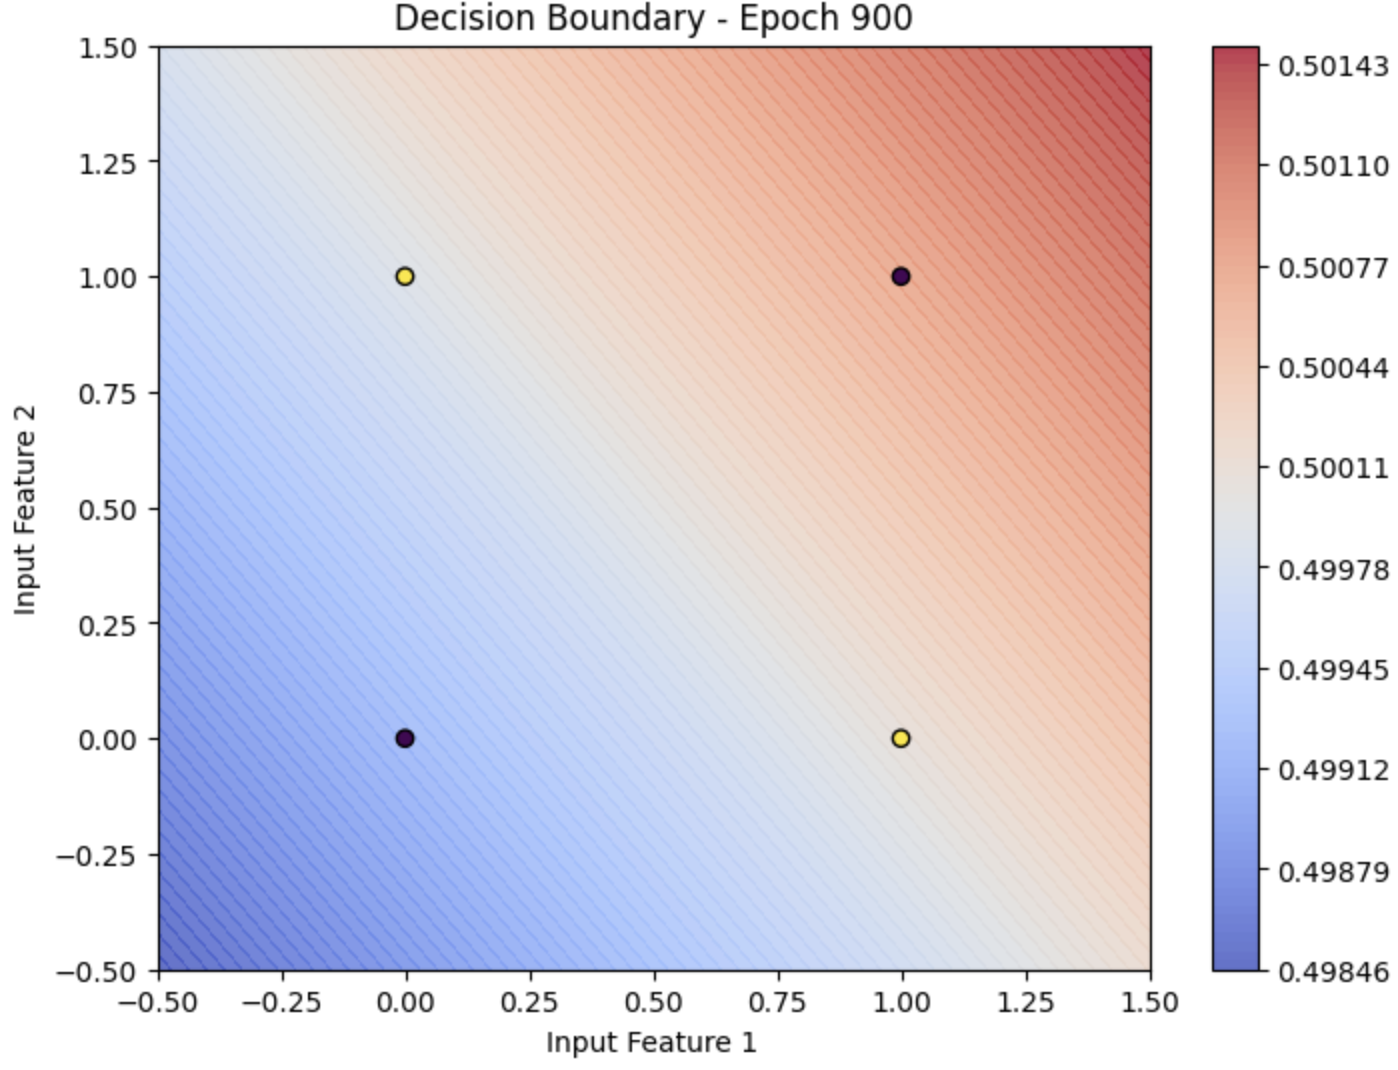

## Train a Convolutional Neural Network (30%)

| Layers | Hyper-parameters |
| :--- | :--- |
| Covolution 1 | Kernel size $= (5, 5, 32)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 1 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Covolution 2 | Kernel size $= (5, 5, 32)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 2 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Covolution 3 | Kernel size $= (5, 5, 64)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 3 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Fully Connected 1 | Output channels $= 64$. Followed by BatchNorm and ReLU. |
| Fully Connected 2 | Output channels $= 10$. Followed by Softmax. |

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

# Define the CNN architecture
class DigitClassification(nn.Module):
    def __init__(self):
        super(DigitClassification, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5, padding='same')
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.AvgPool2d(2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 32, 5, padding='same')
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.AvgPool2d(2, stride=2, padding=0)
        self.conv3 = nn.Conv2d(32, 64, 5, padding='same')
        self.bn3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.AvgPool2d(2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 3 * 3, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)  # Flatten the tensor before fully connected layers
        x = self.relu4(self.bn4(self.fc1(x)))
        x = self.fc2(x)
        return x

model = DigitClassification()
print(model)

# Define data transformations and load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Check if CUDA (GPU) is available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
model.to(device)  # Move the model to the appropriate device

DigitClassification(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=576, out_features=64, bias=True)
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


100%|██████████| 9912422/9912422 [00:00<00:00, 142896412.59it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 26028296.91it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44687270.76it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

100%|██████████| 4542/4542 [00:00<00:00, 7494307.15it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



DigitClassification(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=576, out_features=64, bias=True)
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

Train the CNN on the MNIST dataset using the Cross Entropy loss. Report training and testing curves. Your model should reach $99\%$ accuracy on the
test dataset. (Hint: Normalize the images in the $(-1,1)$ range and use the Adam optimizer).

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Lists to store training and testing statistics
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

# Training loop
for epoch in range(10):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # Convert input data and labels to the same data type as model's weights on the device
        inputs, labels = inputs.to(device, dtype=torch.float), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_accuracy.append(100 * correct_train / total_train)
    train_losses.append(train_loss)
    print(f"Epoch {epoch + 1}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy[-1]:.2f}%")

    # Testing loop
    correct_test = 0
    total_test = 0
    test_running_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            # Convert input data and labels to the same data type as model's weights on the device
            inputs, labels = inputs.to(device, dtype=torch.float), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

        test_loss = test_running_loss / len(testloader)
        test_losses.append(test_loss)
        test_accuracy.append(100 * correct_test / total_test)

    print(f"Epoch {epoch + 1}, Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy[-1]:.2f}%")

Epoch 1, Training Loss: 0.1019, Training Accuracy: 96.99%
Epoch 1, Testing Loss: 0.0365, Testing Accuracy: 98.85%
Epoch 2, Training Loss: 0.0451, Training Accuracy: 98.64%
Epoch 2, Testing Loss: 0.0353, Testing Accuracy: 98.90%
Epoch 3, Training Loss: 0.0366, Training Accuracy: 98.87%
Epoch 3, Testing Loss: 0.0316, Testing Accuracy: 99.00%
Epoch 4, Training Loss: 0.0294, Training Accuracy: 99.03%
Epoch 4, Testing Loss: 0.0272, Testing Accuracy: 99.18%
Epoch 5, Training Loss: 0.0265, Training Accuracy: 99.17%
Epoch 5, Testing Loss: 0.0310, Testing Accuracy: 99.06%
Epoch 6, Training Loss: 0.0238, Training Accuracy: 99.27%
Epoch 6, Testing Loss: 0.0288, Testing Accuracy: 99.06%
Epoch 7, Training Loss: 0.0199, Training Accuracy: 99.41%
Epoch 7, Testing Loss: 0.0250, Testing Accuracy: 99.33%
Epoch 8, Training Loss: 0.0216, Training Accuracy: 99.33%
Epoch 8, Testing Loss: 0.0258, Testing Accuracy: 99.20%
Epoch 9, Training Loss: 0.0164, Training Accuracy: 99.49%
Epoch 9, Testing Loss: 0.0286,

In [25]:
torch.save(model.state_dict(), 'model.pth')

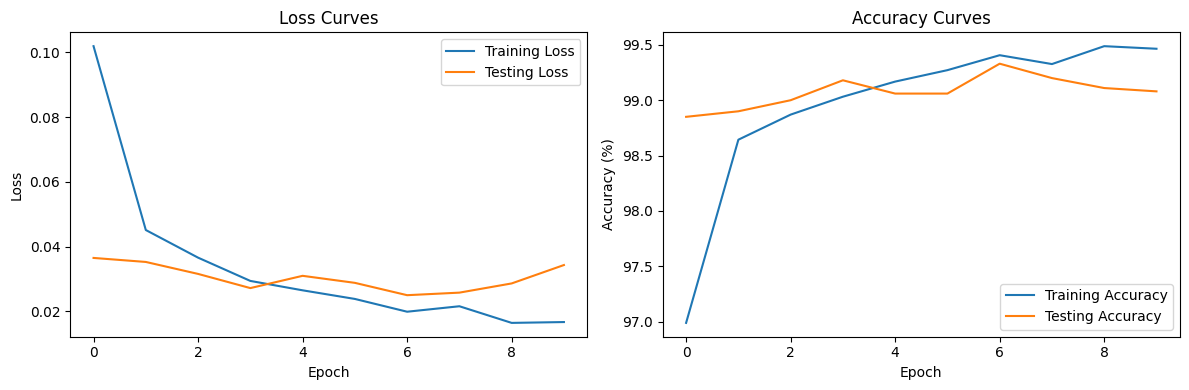

In [26]:
# Plot training and testing curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

* Optimizer: Adam with learning rate of 0.001, batch size for training is 64.
* It was interesting to note that PyTorch's Cross Entropy loss has softmax in-built. I had practical experience specifying parameters in kernel / padding etc.
* The architecture can be improved by adding dropout layers, apply learning rate scheduler, grid search or random search can be useful for finding optimal hyperparameters, try activation functions like Leaky ReLU or variants like Swish, to see if they perform better for the above task.
* From the training and testing curves, I suspect that the model had overfit marginally. The testing and training curves should overlap or have same values in an ideal scenario as per bias-variance tradeoff. Overfitting can be mitigated if the network had regularization / dropout or mofified architecture overall.